In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

# Acquire

In [12]:
df = pd.read_csv('allservicecalls.csv')

In [14]:
df.shape

(495440, 17)

# Prepare

In [16]:
df = wrangle.clean_311(df)
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,zipcode
1207,1012676462,2016-03-25,2020-11-05,2020-10-05,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"1136 KAYTON AVE, San Antonio, 78210",3,2143337.0,13692343.0,1655.0,1686,31.0,Early Response,78210
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"1018 KING AVE, San Antonio, 78211",4,2108015.0,13680344.0,804.0,933,129.0,Very Early Response,78211


# Plan Out Explore

## Questions we want to answer

1. Is there a link to which form of reporting is responded to quickest and slowest?
2. Is the average number of calls in an area affect the response time?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)
4. Does the specific location effect the delay time?
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Lori's Questions
1. Is there a link to which form of reporting is responded to quickest and slowest?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)

### Gabby's Questions
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)

### Sam's Questions
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)

### John's Questions
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Caitlyn's Questions
2. Is the average number of calls in an area affect the response time?
4. Does the specific location effect the delay time?

___

# Start Exploring

___

## Is the average number of calls in an area affect the response time?

### Game plan
- Use the following features in this exploratory analysis
    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay
- Look at the Univariate of each
    - Jot down thoughts, questions, and take aways
- Create bivariate plots seeing how each one plays into one anohter
- Create multivariate  plots

___

## Univariate

#### Zipcode

___

#### Council District

<AxesSubplot:>

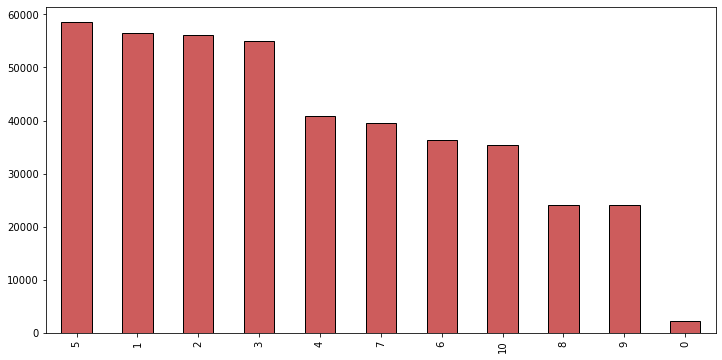

In [4]:
plt.figure(figsize=(12,6))
df['council_district'].value_counts().plot.bar(color='indianred', edgecolor='black')

### Takwaways:
- Districts 1, 2, 3, & 5 have higher reports
- District 0 has nearly no reports in comparison to the others
- 4, 6, 7, 8, 9, & 10 still have many reports but not as much as 1, 2, 3, and 5

___

#### Days Open

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_open', ylabel='Density'>

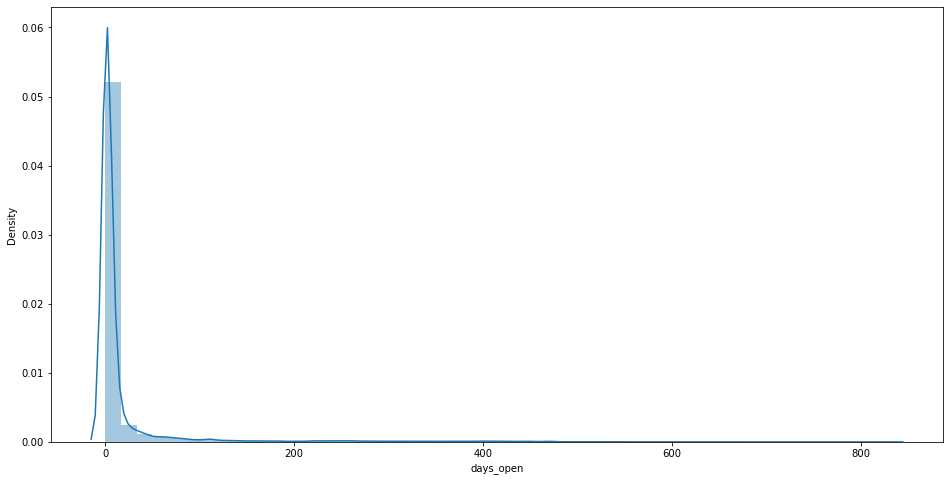

In [20]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_open)

In [6]:
df.shape

(428871, 19)

In [7]:
df.level_of_delay.value_counts()

Early Response              323409
On Time Response             59291
Very Early Response          30855
Late Response                10426
Very Late Response            3609
Extremely Late Response       1134
Extremely Early Response       147
Name: level_of_delay, dtype: int64

In [17]:
df = df[df.days_open < 1400]

In [18]:
df.shape

(428870, 19)

In [19]:
df.level_of_delay.value_counts()

Early Response              323408
On Time Response             59291
Very Early Response          30855
Late Response                10426
Very Late Response            3609
Extremely Late Response       1134
Extremely Early Response       147
Name: level_of_delay, dtype: int64

___

#### Days Until Resolution is Due

___

#### Days Before or After Due Date the Resolution was Made

___

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428871 entries, 1207 to 495432
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   428871 non-null  int64         
 1   open_date                 428871 non-null  datetime64[ns]
 2   due_date                  428871 non-null  datetime64[ns]
 3   closed_date               428871 non-null  datetime64[ns]
 4   is_late                   428871 non-null  object        
 5   dept                      428871 non-null  object        
 6   call_reason               428871 non-null  object        
 7   case_type                 428871 non-null  object        
 8   case_status               428871 non-null  object        
 9   source_id                 428871 non-null  object        
 10  address                   428871 non-null  object        
 11  council_district          428871 non-null  int64         
 12 